### Importing the Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [27]:
dataset = pd.read_pickle("emotion_dataset.pkl", compression='infer')
dataset.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


### Dimension Of the Dataset

In [28]:
rows, cols = dataset.shape
print(f'Emotion Dataset Contains {rows} rows and {cols} columns')

Emotion Dataset Contains 416809 rows and 2 columns


### Types of the Dataset

In [29]:
dataset.dtypes

text        object
emotions    object
dtype: object

### Visualize Unique and Duplicates Entities in  Dataset

<AxesSubplot: xlabel='Records', ylabel='Number of Rows'>

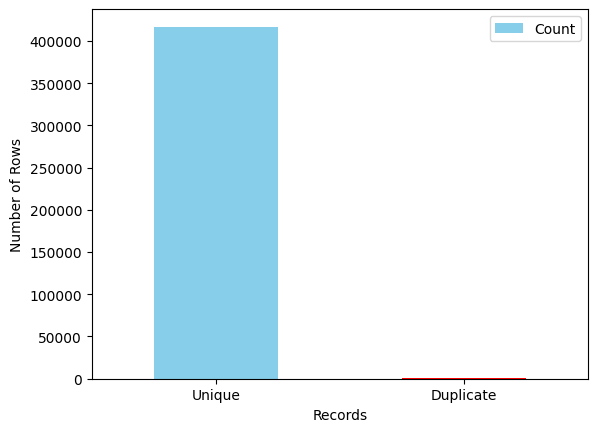

In [30]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text', 'emotions']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### Remove Duplicates Entities of the Dataset

In [31]:
dataset = dataset.drop_duplicates(subset=['text', 'emotions'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 686
After dropping duplicate rows the remaining rows x cols of the dataset are 416123 x 2


### Checking For Null Values in the Dataset

In [32]:
dataset.isna().any()

text        False
emotions    False
dtype: bool

In [33]:
print('There are no NULL values in the dataset')

There are no NULL values in the dataset


### Summary of the Dataset

In [34]:
dataset.describe()

,text,emotions
count,416123,416123
unique,393822,6
top,when,joy
freq,4,140779


### Bar Chart - Visualizing the Number of Entities against each Emotion

<AxesSubplot: xlabel='Emotions', ylabel='Records'>

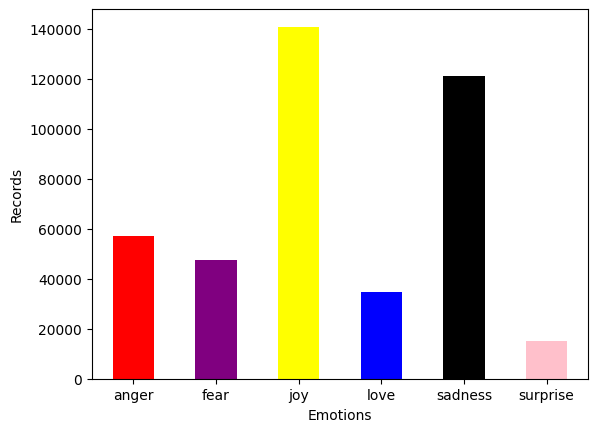

In [35]:
emotions_count = dataset.groupby(['emotions'])['emotions'].count()
col = ['red', 'purple', 'yellow', 'blue', 'black', 'pink']
emotions_count.plot.bar(xlabel='Emotions', ylabel='Records', rot=0, color=col)

### Pie Chart - Visualizing the Number of Entities against each Emotion

<AxesSubplot: ylabel='Type'>

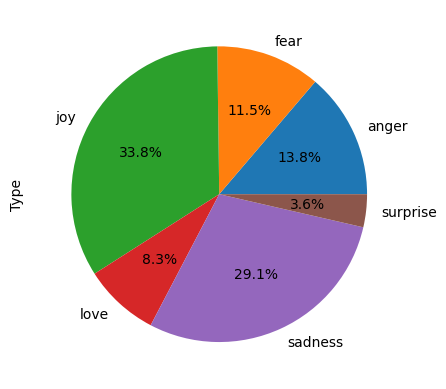

In [36]:
emotions_size = emotions_count = dataset.groupby(['emotions'])['emotions'].size()
emotions_size.plot(kind='pie', y = "v1", label = "Type", autopct='%1.1f%%')

### Cleaning the Dataset

In [37]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
# clean the text
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
# replace the old text with the cleaned text
dataset['text'] = dataset['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
dataset.head()

,text,emotions
27383,feel awful job get position succeed happen,sadness
110083,im alone feel awful,sadness
140764,ive probably mentioned really feel proud actua...,joy
100071,feeling little low days back,sadness
2837,beleive much sensitive peoples feelings tend c...,love
